# Extended Forecasting Tutorial

--- 

> ## Table of contents 

> 1. ### <span style="color:orange">Datasets</span>
    1.1 Available datasets on GluonTS  
    1.2 Create artificial datasets with GluonTS  
    1.3 Use your time series and features
> 2. ### <span style="color:orange">Transformation</span>
    2.1 Define a transformation  
    2.2 Transform a dataset 
> 3. ### <span style="color:orange">Training an existing model</span>
    3.1 Configuring an estimator  
    3.2 Getting a predictor  
    3.3 Saving/Loading an existing model  
> 4. ### <span style="color:orange">Evaluation</span>
    4.1 Getting the forecasts  
    4.2 Compute metrics  
> 5. ### <span style="color:orange">Create your own model</span>
    5.1 Point forecasts with a simple feedforward network  
    5.2 Probabilistic forecasting  
    5.3 Add features and scaling   
    5.4 From feedforward to RNN

In [1]:
# standard imports
import numpy as np
import pandas as pd

import os
import json
from itertools import islice
from pathlib import Path

# Vis 
%matplotlib inline 
import matplotlib.pyplot as plt

# mxnet
import mxnet as mx
from mxnet import gluon


In [2]:
mx.random.seed(0)
np.random.seed(0)


# 1. Datasets

> First requirement: Have an appropriate dataset!

GluonTS has three different options for datasets:

- Use a built-in dataset
- Create artificial dataset
- Convert own dataset to a GluonTS friendly format

For each dataset: 

- iterable collection of data entries (time series)
- each entry have at least a `target` field containing the actual values
- each entry has a `start` field, which denotes the starting date of the time series

## 1.1 Available datasets on GluonTS

In [4]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

print("Available datasets:") 
print(list(dataset_recipes.keys()))


Available datasets:
['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly']


In [5]:
# download dataset with get_dataset
dataset = get_dataset("m4_hourly", regenerate=True)


INFO:root:downloading and processing m4_hourly


saving time-series into C:\Users\TM\.mxnet\gluon-ts\datasets\m4_hourly\train\data.json
saving time-series into C:\Users\TM\.mxnet\gluon-ts\datasets\m4_hourly\test\data.json


### 1.1.1 What's in a dataset?

Three main components: 

- `dataset.train` is an iterable collection of data entries used for training. Each entry corresponds to one time series.
- `dataset.test` is an iterable collection of data entries used for inference. The test dataset is an extended version of the train dataset that contains a window in the end of each time series that was not seen during training. This window has length equal to the recommended prediction length.
- `dataset.metadata` containts metadata of the dataset such as the frequency of the time series, a recommended prediction horizon, associated features, etc.



In [7]:
# get first time series in the training set
train_entry = next(iter(dataset.train))
train_entry.keys()


dict_keys(['start', 'target', 'feat_static_cat', 'source'])

In addition to `start` and `target`, there is a `feat_static_cat` field. This shows that the dataset has some features apart fom the values of the time series


In [17]:
# show cat
train_entry["feat_static_cat"]

array([0])

In [20]:
dataset.metadata

<MetaData freq='H' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='414'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=48>

In [22]:
# show first entry in test set
test_entry = next(iter(dataset.test))
test_entry.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'source'])

Note that the target will have an additional window in the end with length equal to `prediction_length`. 

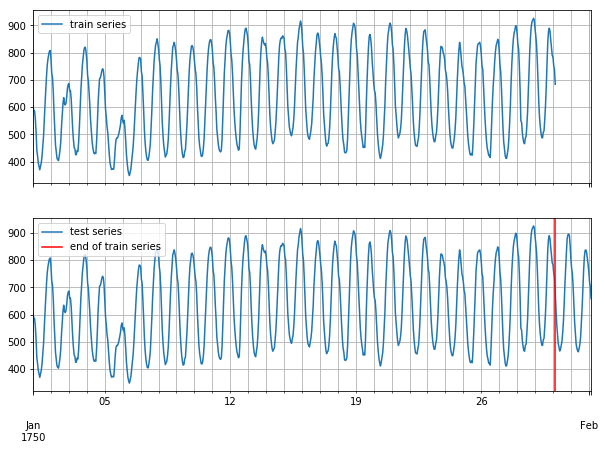

In [23]:
# convert series to pandas
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

### Plot
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()


In [29]:
print("Length of forecasting window in test dataset: {}".format(len(test_series) - len(train_series)))
print("Recommended prediction horizon: {}".format(dataset.metadata.prediction_length))
print("Frequency of the time series: {}".format(dataset.metadata.freq))


Length of forecasting window in test dataset: 48
Recommended prediction horizon: 48
Frequency of the time series: H


## 1.2 Create artificial datasets

Create a complex artificial time series dataset using the `ComplexSeasonalTimeSeries` module.

(...)

## 1.3 Use your time series and features (custom dataset)

Convert any custom dataset with any associated features to GluonTS compatible format.

(...)

